<a href="https://colab.research.google.com/github/KalinaPeneva/Spin-Squeezing-In-Python/blob/main/Modeling_Squeezed_Spin_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Code + Explaining Functions

**Run the cell below. Do not modify (unless you have certain reasons)**

In [ ]:
#@markdown Run this cell for imports and functions
#@markdown 
!pip install qutip

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import qutip

def spinup(n):
    return [[np.random.randint(2) - 1/2, np.random.randint(2) - 1/2, 1/2] 
            for i in range(n)]

def spindown(n):
    return [[np.random.randint(2) - 1/2, np.random.randint(2) - 1/2, -1/2] 
            for i in range(n)]

def all_S(spin_ensemble):
    return [sum(j[i] for j in spin_ensemble) for i in range(3)]

def single_spin_rotation_along_z(spin, amount):
    rotation_matrix = [[np.cos(amount), np.sin(amount), 0], 
                       [- np.sin(amount), np.cos(amount), 0], [0, 0, 1]]
    spin = np.dot(np.array(rotation_matrix), spin)
    return spin
    
def single_spin_rotation_along_y(spin, amount):
    rotation_matrix = [[np.cos(amount), 0, - np.sin(amount)], [0, 1, 0], 
                       [np.sin(amount), 0, np.cos(amount)]]
    spin = np.dot(np.array(rotation_matrix), spin)
    return spin

def single_spin_rotation_along_x(spin, amount):
    rotation_matrix = [[1, 0, 0], [0, np.cos(amount), -np.sin(amount)], 
                       [0, np.sin(amount), np.cos(amount)]]
    spin = np.dot(np.array(rotation_matrix), spin)
    return spin

def show_on_bloch(spin_realization, N):
    b = qutip.Bloch()
    b.sphere_alpha = 0.0
    b.frame_alpha = 0.05
    b.add_points(np.array([spin/np.sqrt(N/2*(N/2+1)) 
                            for spin in spin_realization]).T)
    b.point_color=['C0']
    b.point_marker = '.'
    b.zlabel = ['$z$', '']
    b.render()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.7 MB 433 kB/s 


Explain the functions: 

`def spinup(n)`: take atom number $N$ as input, return an array of $N$ random 3-d vectors, each of them is $(\pm0.5,\pm0.5,0.5)$. Input: $N$, Output: $[s_1,s_2,\cdots,s_N]$
    
`def spindown(n)`: take atom number $N$ as input, return an array of $N$ random 3-d vectors, each of them is $(\pm0.5,\pm0.5,-0.5)$. Input: $N$, Output: $[s_1,s_2,\cdots,s_N]$


`def all_S(spin_ensemble)`: take an array of $N$ random 3-d vectors as input, return a 3-d vector, as a sum of all vectors in the array. Input: $[s_1,s_2,\cdots,s_N]$, output: $S^{\alpha=x,y,z}=\sum_i^Ns_i^\alpha$

`def single_spin_rotation_along_z(spin, amount)`: take a 3-d vector and "amount" as input, return a 3-d vector with a rotation of it along $z$-direction by "amount". Input: $s=[s^x,s^y,s^z]$, Output: $s'=[s'^x,s'^y,s'^z]$

`def single_spin_rotation_along_y(spin, amount)`: take a 3-d vector and "amount" as input, return a 3-d vector with a rotation of it along $y$-direction by "amount". Input: $s=[s^x,s^y,s^z]$, Output: $s'=[s'^x,s'^y,s'^z]$

`def single_spin_rotation_along_x(spin, amount)`: take a 3-d vector and "amount" as input, return a 3-d vector with a rotation of it along $x$-direction by "amount". Input: $s=[s^x,s^y,s^z]$, Output: $s'=[s'^x,s'^y,s'^z]$

`def show_on_bloch(spin_realization, N)`: take an array of $M$ random 3-d vectors, and atom number $N$ as input, plot the array on a Bloch sphere. Note that the spin_realization contains $M$, the number of random realizations, of the 3-d vectors, and each vector should be calculated by `all_S`. Input: $[S_1,S_2,\cdots,S_M]$ and $N$

### Intial Exploration of Visualizations on Bloch Sphere

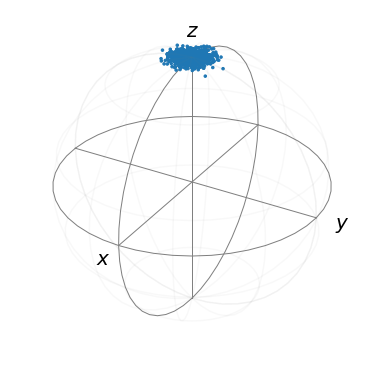

In [ ]:
#Realization of spin up function on Bloch Sphere
N = 200 #number of atoms 
allSresults = [all_S(spinup(N)) for i in range(1000)] #1000 is number of realizations for the set of 200 atoms
show_on_bloch(allSresults, N) #visualization of spin up realization

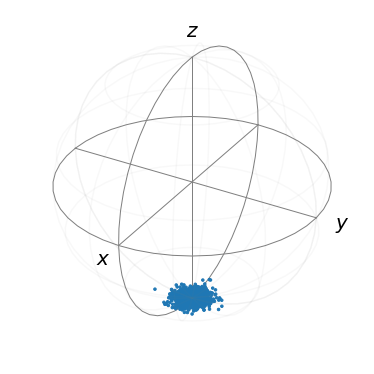

In [ ]:
#Realization of spin down function on Bloch Sphere
N = 200 #number of atoms 
allSresults = [all_S(spindown(N)) for i in range(1000)] #1000 is number of realizations for the set of 200 atoms
show_on_bloch(allSresults, N) #visualization of spin down realization

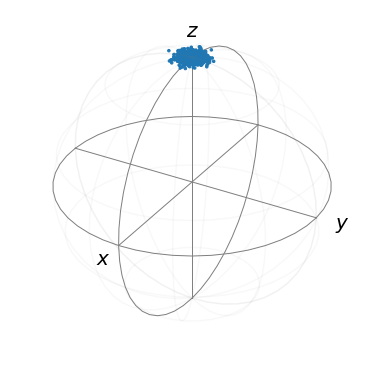

In [ ]:
#Manipulating Variable N Part 1
N = 350 #inc number of atoms
allSresults = [all_S(spinup(N)) for i in range(1000)]
show_on_bloch(allSresults, N) 

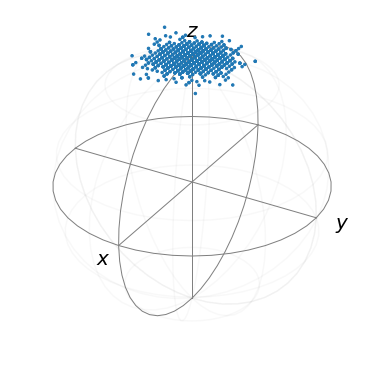

In [ ]:
#Manipulating Variable N Part 2
N = 50 #dec number of atoms
allSresults = [all_S(spinup(N)) for i in range(1000)]
show_on_bloch(allSresults, N) 

### Conducting Rotations on Bloch Sphere

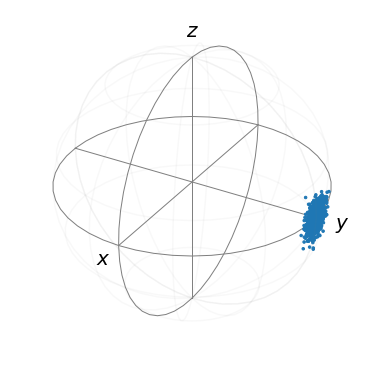

In [ ]:
#Rotation along the X Axis
N = 200
allSresults = [all_S(spinup(N)) for i in range(1000)] #defining initial state of the atoms for 1000 realizations 
allSresults_Y = [single_spin_rotation_along_x(i, -np.pi/2) for i in allSresults] #conducting rotation along X axis for every atom in each realization
show_on_bloch(allSresults_Y, N)

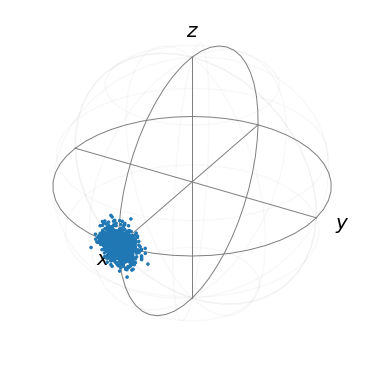

In [ ]:
#Rotation along the Y Axis
N = 200
allSresults = [all_S(spinup(N)) for i in range(1000)]
allSresults_X = [single_spin_rotation_along_y(i, -np.pi/2) for i in allSresults] #conducting rotation along Y axis for every atom in each realization
show_on_bloch(allSresults_X, N)

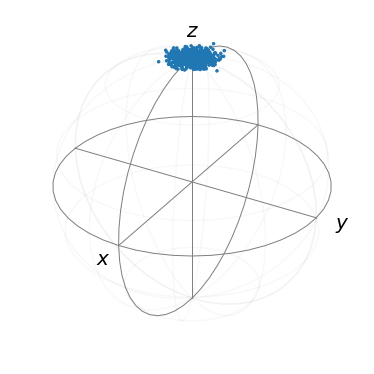

In [ ]:
#Rotation along Z Axis
N = 200
allSresults = [all_S(spinup(N)) for i in range(1000)]
allSresults_Z = [single_spin_rotation_along_z(i, -np.pi/2) for i in allSresults] #conducting rotation along Z axis for every atom in each realization
show_on_bloch(allSresults_Z, N)

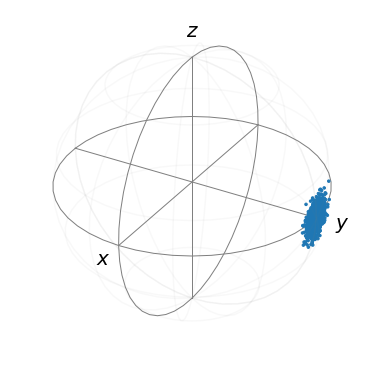

In [ ]:
#Two Axis Rotation
initial_state = spinup(N) #defining the initial state

final_results = []
for realization_index in range(1000): #allows for each realization to be put through the "for loop" for both rotations
  N=200
  initial_state = spinup(N) #establishing initial state within each realization  
  intermediate_state = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in initial_state] #application of the Y-axis rotation
  final_state = [single_spin_rotation_along_z(atom, -np.pi/2) for atom in intermediate_state] #allows for the application of the Z-axis rotation from the intermediate_state position
  final_results.append(all_S(final_state)) #places the array/list of realizations from the final state into the final_results list

show_on_bloch(final_results, N) #visualization of rotation along two axes
  

# 

### Preparation for One Axis Twisting (OAT) and Two Axis Twisting (TAT) Using Evolution Functions

##### -These lines of code must be run for OAT and TAT to work when creating a squeezed spin state 
##### -The evolution functions are the realization of spin_ensemble, similar to the results observed by the spinup function, after evolving under the Hamiltonian for t

In [ ]:
def sz2_evolution(spin_ensemble, t):  
  B = all_S(spin_ensemble)[2]
  amount = B * t
  spin_ensemble = [single_spin_rotation_along_z(atom, amount) for atom in spin_ensemble]
  return spin_ensemble

In [ ]:
def sz3_evolution(spin_ensemble, t):
  B = (all_S(spin_ensemble)[2])**2
  amount = B * t
  spin_ensemble = [single_spin_rotation_along_z(atom, amount) for atom in spin_ensemble]
  return spin_ensemble

In [ ]:
def sy2_evolution(spin_ensemble, t):
  B = all_S(spin_ensemble)[1]
  amount = B * t
  spin_ensemble = [single_spin_rotation_along_y(atom, amount) for atom in spin_ensemble]
  return spin_ensemble

In [ ]:
def sy3_evolution(spin_ensemble, t):
  B = (all_S(spin_ensemble)[1])**2
  amount = B * t
  spin_ensemble = [single_spin_rotation_along_y(atom, amount) for atom in spin_ensemble]
  return spin_ensemble

In [ ]:
def sx2_evolution(spin_ensemble, t):
  B = all_S(spin_ensemble)[0]
  amount = B * t
  spin_ensemble = [single_spin_rotation_along_x(atom, amount) for atom in spin_ensemble]
  return spin_ensemble

In [ ]:
def sx3_evolution(spin_ensemble, t):
  B = (all_S(spin_ensemble)[0])**2
  amount = B * t
  spin_ensemble = [single_spin_rotation_along_x(atom, amount) for atom in spin_ensemble]
  return spin_ensemble

### One Axis Twisting (OAT)

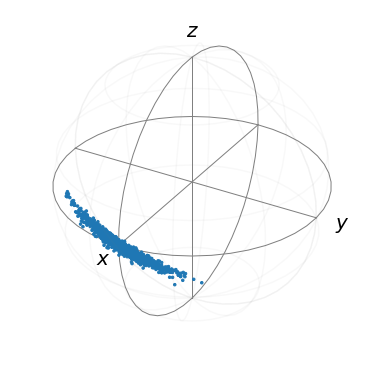

In [ ]:
#OAT using sz2_evolution
N = 200
t = 5 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along x-direction
  spin_ensemble = sz2_evolution(spin_ensemble, t) #application of sz2_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

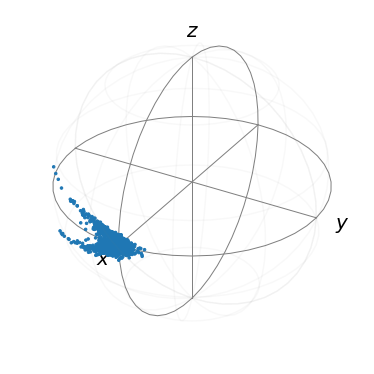

In [ ]:
#OAT using sz3_evolution
N = 200
t = .3 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along x-direction
  spin_ensemble = sz3_evolution(spin_ensemble, t) #application of sz3_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

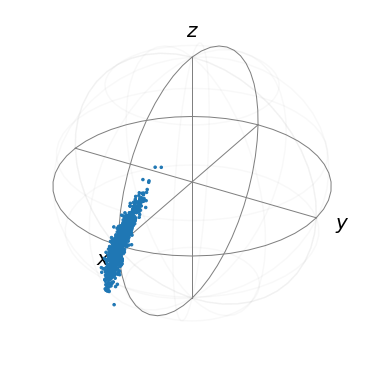

In [ ]:
#OAT using sy2_evolution
N = 200
t = 5 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along x-direction
  spin_ensemble = sy2_evolution(spin_ensemble, t) #application of sy2_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

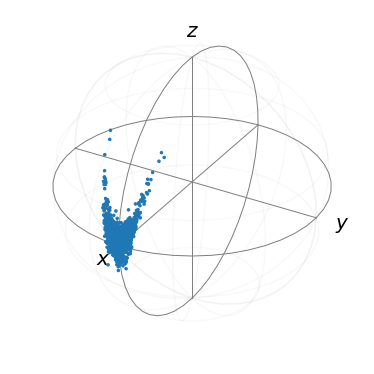

In [ ]:
#OAT using sy3_evolution
N = 200
t = .3 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along x-direction
  spin_ensemble = sy3_evolution(spin_ensemble, t) #application of sy3_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

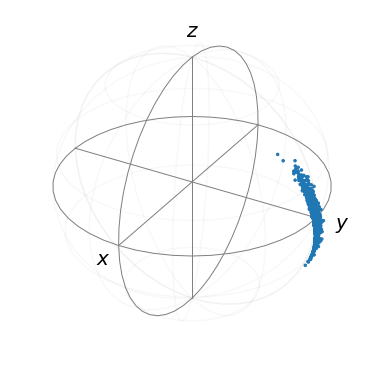

In [ ]:
#OAT using sx2_evolution
N = 200
t = 5 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_x(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along y-direction
  spin_ensemble = sx2_evolution(spin_ensemble, t) #application of sx2_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

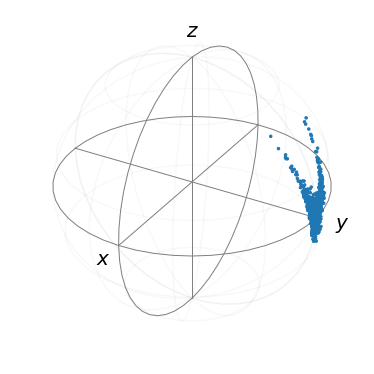

In [ ]:
#OAT using sx3_evolution
N = 200
t = .3 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_x(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along y-direction
  spin_ensemble = sx3_evolution(spin_ensemble, t) #application of sx3_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

### Two Axis Twisting (TAT)

In [ ]:
#Defining the perameters of the function TAT_Delta_t(...)
def TAT_Delta_t(spin_ensemble, Delta_t): 
  ...
N = 200
t = 5 / N
P = 10
Delta_t = t / (2 * P)

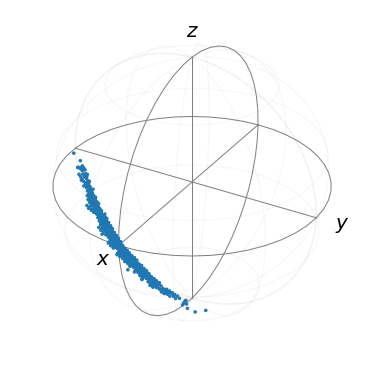

In [ ]:
# This block is meant to test the funciton TAT_Delta_t(...)
final_results = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) 
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble]
  for _ in range(P):
    spin_ensemble = sz2_evolution(spin_ensemble, Delta_t)
    spin_ensemble = sy2_evolution(spin_ensemble, -Delta_t)
  final_results.append(all_S(spin_ensemble))

show_on_bloch(final_results, N)

In [ ]:
#Testing new perameters for the function TAT_Delta_t(...)
N=200
t = .3 / N
P = 10
Delta_t = t / (2 * P)

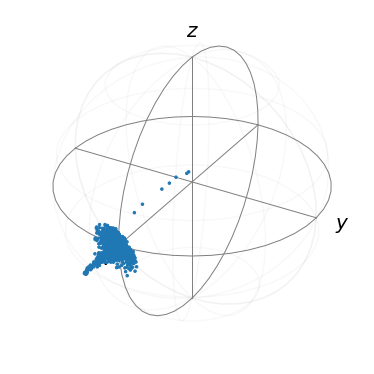

In [ ]:
#Testing cubed evolutions
final_results = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) 
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble]
  for _ in range(P):
    spin_ensemble = sz3_evolution(spin_ensemble, Delta_t)
    spin_ensemble = sy3_evolution(spin_ensemble, -Delta_t)
  final_results.append(all_S(spin_ensemble))

show_on_bloch(final_results, N)
#Outcome: not much utility to this shape as it is not squeezed very much 

### Visualizing Utility of Squeezed Spin States

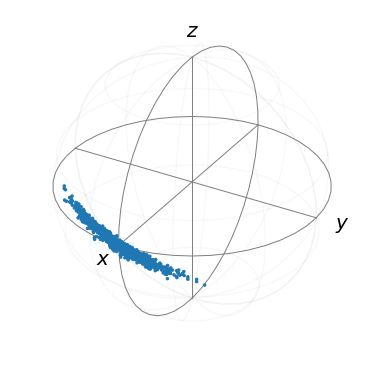

In [ ]:
#OAT using sz2_evolution
N = 200
t = 5 / N

final_results = []
all_realizations = []
for realization_index in range(1000):
  spin_ensemble = spinup(N) #establishing initial state of spin_ensemble
  spin_ensemble = [single_spin_rotation_along_y(atom, -np.pi/2) for atom in spin_ensemble] #preparinig spin_ensemble along x-direction
  spin_ensemble = sz2_evolution(spin_ensemble, t) #application of sz2_evolution on the spin_ensemble
  final_results.append(all_S(spin_ensemble)) #calculate all_S (total projection of spin_ensemble)
  all_realizations.append(spin_ensemble) #repeat this process 1000 times by storing all results in a new array 

show_on_bloch(final_results, N)

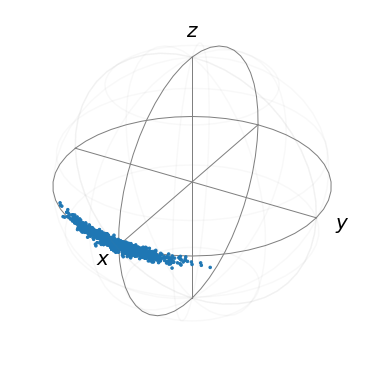

In [ ]:
  # rotate all spins by amount theta
theta = np.pi/12
rotated_spins = [[single_spin_rotation_along_x(atom, theta) for atom in spin] for spin in all_realizations]
total_rotated_spins = [all_S(spin) for spin in rotated_spins]

show_on_bloch(total_rotated_spins, N)

In [ ]:
# not a squeezed state
N = 200 # atom number
allSresults = [all_S(spinup(N)) for i in range(1000)] # 1000 is random realization numbers
allSresults_X = [single_spin_rotation_along_y(i, -np.pi/2) for i in allSresults]

Text(0, 0.5, 'Count')

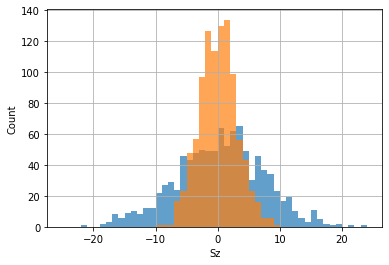

In [ ]:
fig, ax = plt.subplots()

Sz_squeezed = [spin[2] for spin in total_rotated_spins]
Sz_not_squeezed = [spin[2] for spin in allSresults_X]

bins = np.arange(-25, 25, 1)
ax.hist(Sz_not_squeezed, bins=bins, alpha=0.7)
ax.hist(Sz_squeezed, bins=bins, alpha=0.7)

ax.grid(True)
ax.set_xlabel("Sz")
ax.set_ylabel("Count")